In [10]:
from __future__ import print_function
import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from IPython.display import Image
import os
import sys

%matplotlib inline

In [5]:
# Read images from the directory.
def readImages(path):
    print("Reading images from " + path, end = "...")
    # Create array of array of images.
    images = []
    # List all files in the directory and read points from text files one by one.
    for filePath in sorted(os.listdir(path)):
        fileExt = os.path.splitext(filePath)[1]
        if fileExt in [".jpg", ".jpeg"]:

            # Add to array of images.
            imagePath = os.path.join(path, filePath)
            im = cv2.imread(imagePath)

            if im is None :
                print("image:{} not read properly".format(imagePath))
            else :
                # Convert image to floating point.
                im = np.float32(im)/255.0
                # Add image to list.
                images.append(im)
                # Flip image.
                imFlip = cv2.flip(im, 1);
                # Append flipped image.
                images.append(imFlip)
    numImages = int(len(images) / 2)
    # Exit if no image found.
    if numImages == 0 :
        print("No images found")
        sys.exit(0)

    print(str(numImages) + " files read.")
    return images

In [6]:
# Create data matrix from a list of images.
def createDataMatrix(images):
    print("Creating data matrix", end = " ... ")

    numImages = len(images)
    sz = images[0].shape
    # Data matrix.
    data = np.zeros((numImages, sz[0] * sz[1] * sz[2]), dtype = np.float32)
    for i in range(0, numImages):
        image = images[i].flatten()
        # Each row get replaced with one flattened image.
        data[i,:] = image

    print("DONE")
    return data

In [7]:
def createNewFace(*args):
    # Start with the mean image.
    output = averageFace

    # Add the eigen faces with the weights.
    for i in range(0, NUM_EIGEN_FACES):
        # Get trackbar position.
        sliderValues[i] = cv2.getTrackbarPos("Weight" + str(i), "Trackbars");
        weight = sliderValues[i] - MAX_SLIDER_VALUE/2
        # Add the weighted eigen face to the mean face.
        output = np.add(output, eigenFaces[i] * weight)

    # Display Result at 2x size.
    output = cv2.resize(output, (0,0), fx = 2, fy = 2)
    cv2.imshow("Result", output)

In [11]:
if __name__ == '__main__':

    # Number of EigenFaces.
    NUM_EIGEN_FACES = 3

    # Maximum weight.
    MAX_SLIDER_VALUE = 255

    # Directory containing images.
    dirName = "samples"

    # Read images.
    images = readImages(dirName)

    # Size of images.
    sz = images[0].shape

    # Create data matrix for PCA.
    data = createDataMatrix(images)

    # Compute the eigenvectors from the stack of images created.
    print("Calculating PCA ", end = "...")
    
    mean, eigenVectors = cv2.PCACompute(data, mean = None, maxComponents = NUM_EIGEN_FACES)
    
    print ("DONE")

    averageFace = mean.reshape(sz)

    # Create a container to hold eigen faces.
    eigenFaces  = []

    # Reshape eigen vectors to eigen faces.
    for eigenVector in eigenVectors:
        # REshape.
        eigenFace = eigenVector.reshape(sz)
        # Append eigen faces to the container.
        eigenFaces.append(eigenFace)

    # Create window for displaying result.
    cv2.namedWindow("Result", cv2.WINDOW_NORMAL)
    # Create window for displaying mean face.
    cv2.namedWindow("Average", cv2.WINDOW_NORMAL)

    # Upscale by a factor of two.
    output = cv2.resize(averageFace, (0,0), fx = 2, fy = 2)
    
    # Display.
    cv2.imshow("Result", output)
    cv2.imshow("Average", averageFace)

    # Create Window for trackbars.
    cv2.namedWindow("Trackbars", cv2.WINDOW_NORMAL)

    # Create a list to contain slider values.
    sliderValues = []

    # Create Trackbars.
    for i in range(0, NUM_EIGEN_FACES):
        sliderValues.append(int(MAX_SLIDER_VALUE/2))
        cv2.createTrackbar( "Weight" + str(i), "Trackbars", int(MAX_SLIDER_VALUE/2), MAX_SLIDER_VALUE, createNewFace)

    # You can reset the sliders by clicking on the mean image.
    cv2.setMouseCallback("Average", resetSliderValues);

    print('''Usage:
    Change the weights using the sliders.
    Mouse hover on the result window to reset sliders.
    Press q to terminate.''')

    key = cv2.waitKey(0)
    if key == ord('q'):
        cv2.destroyAllWindows()

Reading images from samples...3 files read.
Creating data matrix ... DONE
Calculating PCA ...DONE


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1250: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'


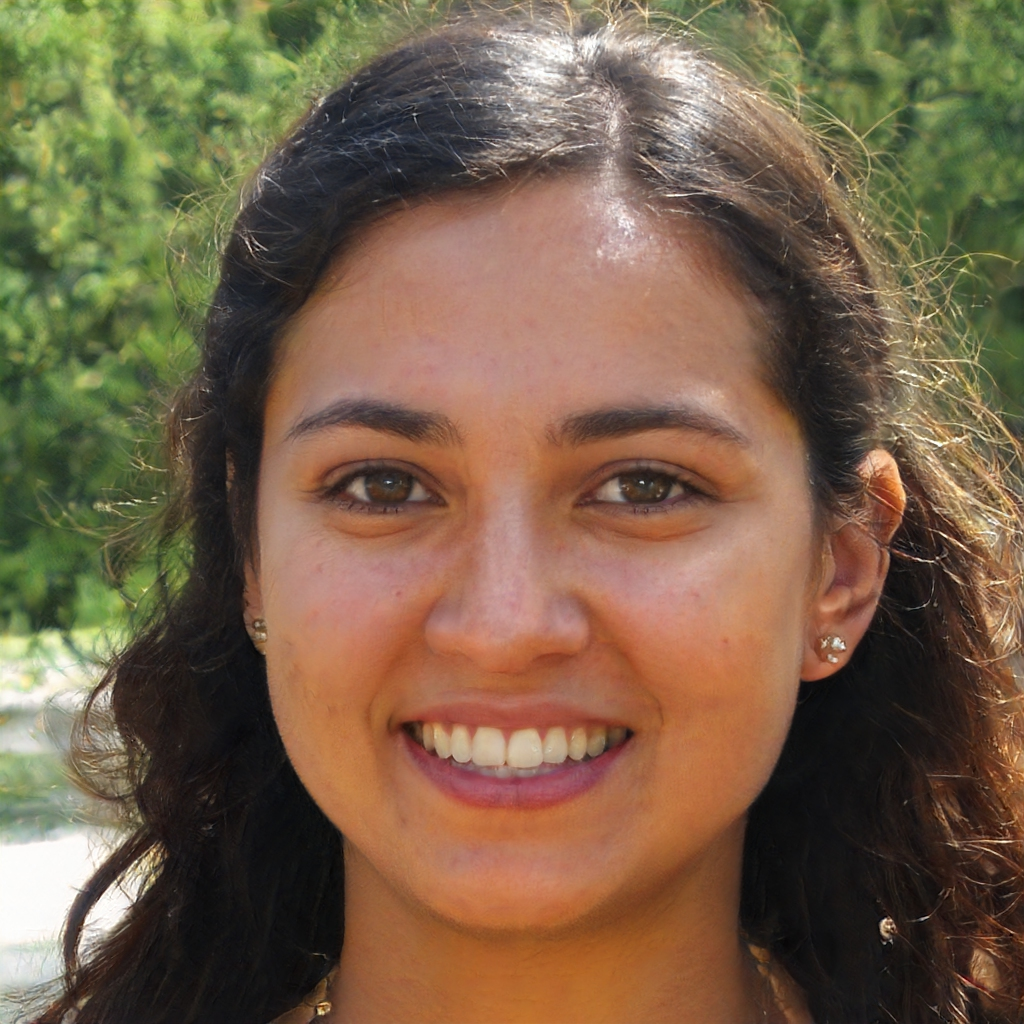

In [72]:
Image(filename="samples/faccia_da_cazzo_per_prove-2.jpg") 

In [43]:
imgFacciaDaCazzo = cv2.imread("samples/faccia_da_cazzo_per_prove.jpg")

In [71]:
imgFacciaDaCazzo = cv2.imread("samples/faccia_da_cazzo_per_prove-2.jpg")

In [14]:
from rembg import remove, new_session

input_folder = 'samples'
output_folder = 'samplesNOBG'

my_session = new_session("u2net_human_seg")


# Itera i file nella cartella
for filename in os.listdir(input_folder):
    # Costruisci il percorso completo del file
    image_path = os.path.join(input_folder, filename)
    image_noBGpath = os.path.join(output_folder, filename)

    # Controlla se il file è un file regolare
    if os.path.isfile(image_path):
        with open(image_path, 'rb') as i:
            with open(image_noBGpath, 'wb') as o:
                input = i.read()
                output = remove(input, my_session)
                o.write(output)

NameError: name 'folder_path' is not defined

In [86]:
gray = cv2.cvtColor(imgFacciaDaCazzo, cv2.COLOR_BGR2GRAY) #bianco e nero

In [87]:
face_cascade = cv2.CascadeClassifier("Classifiers/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("Classifiers/haarcascade_eye.xml")
nose_cascade = cv2.CascadeClassifier("Classifiers/haarcascade_mcs_nose.xml")
mouth_cascade = cv2.CascadeClassifier("Classifiers/haarcascade_mcs_mouth.xml")

In [88]:
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

In [89]:
len(faces)

1

In [90]:
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    nose = nose_cascade.detectMultiScale(roi_gray)
    mouth = mouth_cascade.detectMultiScale(roi_gray)


In [91]:
eyes

array([[117, 156, 173, 173],
       [345, 172, 168, 168],
       [248, 550,  40,  40],
       [264, 548,  52,  52],
       [261, 476,  39,  39]])

In [92]:
nose

array([[214, 308, 193, 160]])

In [93]:
mouth

array([[188, 440, 250, 150],
       [107, 201, 201, 120],
       [373, 243, 147,  88]])

In [94]:
for (x, y, w, h) in faces:
    # Extract the face ROI
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # Detect eyes in the face ROI
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    print(len(eyes))
    
    # Loop over the eyes
    for (ex, ey, ew, eh) in eyes:
        # Extract the eye ROI
        eye_roi = roi_color[ey:ey+eh, ex:ex+ew]

        # Calculate the mean color of the eye ROI
        mean_color = np.mean(eye_roi, axis=(0, 1))

        # Round the color values to integers
        mean_color = np.array(mean_color, dtype=np.uint8)

        # Print the color of the eye
        print("Eye color:", mean_color)

5
Eye color: [ 84 100 135]
Eye color: [100 119 168]
Eye color: [ 70 108 161]
Eye color: [ 78 109 162]
Eye color: [ 97 126 180]


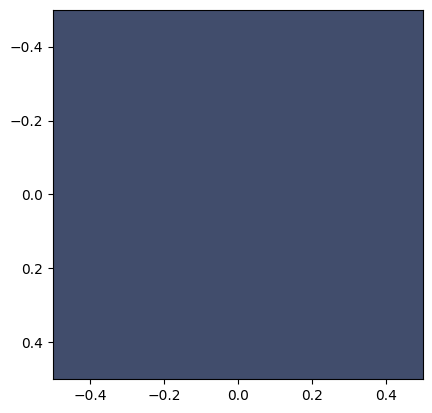

In [83]:
import matplotlib.pyplot as plt
plt.imshow([[(65/255, 77/255, 108/255)]])

In [106]:
NUM_EIGEN_FACES = 3

MAX_SLIDER_VALUE = 255

# Directory containing images
dirName = "samples"

# Read images
images = readImages(dirName)

# Size of images
sz = images[0].shape

# Create data matrix for PCA.
data = createDataMatrix(images)

# Compute the eigenvectors from the stack of images created
print("Calculating PCA ", end="...")
mean, eigenVectors = cv2.PCACompute(data, mean=None, maxComponents=NUM_EIGEN_FACES)
print ("DONE")

averageFace = mean.reshape(sz)

eigenFaces = []; 

for eigenVector in eigenVectors:
    eigenFace = eigenVector.reshape(sz)
    eigenFaces.append(eigenFace)

# Create window for displaying Mean Face
cv2.namedWindow("Result", cv2.WINDOW_AUTOSIZE)

# Display result at 2x size
output = cv2.resize(averageFace, (0,0), fx=2, fy=2)
cv2.imshow("Result", output)

# Create Window for trackbars
cv2.namedWindow("Trackbars", cv2.WINDOW_AUTOSIZE)

sliderValues = []

# Create Trackbars
for i in xrange(0, NUM_EIGEN_FACES):
    sliderValues.append(MAX_SLIDER_VALUE/2)
    cv2.createTrackbar( "Weight" + str(i), "Trackbars", MAX_SLIDER_VALUE/2, MAX_SLIDER_VALUE, createNewFace)

# You can reset the sliders by clicking on the mean image.
cv2.setMouseCallback("Result", resetSliderValues);

print('''Usage:
Change the weights using the sliders
Click on the result window to reset sliders
Hit ESC to terminate program.''')

cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'createDataMatrix' is not defined

In [103]:
def createNewFace(*args):
    # Start with the mean image
    output = averageFace

    # Add the eigen faces with the weights
    for i in range(0, NUM_EIGEN_FACES):
        sliderValues[i] = cv2.getTrackbarPos("Weight" + str(i), "Trackbars");
        weight = sliderValues[i] - MAX_SLIDER_VALUE/2
        output = np.add(output, eigenFaces[i] * weight)
    output = cv2.resize(output, (0,0), fx=2, fy=2)
    cv2.imshow("Result", output)